## Part 1: Calculations

In [30]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [31]:
# Given data points (A1 to A5)
points = np.array([[3,6], [6,3], [8,6], [2,1], [5,9]])

# Initial centroids A2 and A4
initial_centroids = np.array([[6,3], [2,1]])


Cluster 1 points: [[3 6]
 [6 3]
 [8 6]
 [5 9]]
New centroid 1: [5.5 6. ]

Cluster 2 points: [[2 1]]
New centroid 2: [2. 1.]

Clustering Results:
-----------------
Distances from points to initial centroids:

Point A1 (3, 6):
Distance to C1 (A2): 4.24
Distance to C2 (A4): 5.10
Assigned to Cluster: 1

Point A2 (6, 3):
Distance to C1 (A2): 0.00
Distance to C2 (A4): 4.47
Assigned to Cluster: 1

Point A3 (8, 6):
Distance to C1 (A2): 3.61
Distance to C2 (A4): 7.81
Assigned to Cluster: 1

Point A4 (2, 1):
Distance to C1 (A2): 4.47
Distance to C2 (A4): 0.00
Assigned to Cluster: 2

Point A5 (5, 9):
Distance to C1 (A2): 6.08
Distance to C2 (A4): 8.54
Assigned to Cluster: 1

New centroids:
Cluster 1: (5.50, 6.00)
Cluster 2: (2.00, 1.00)


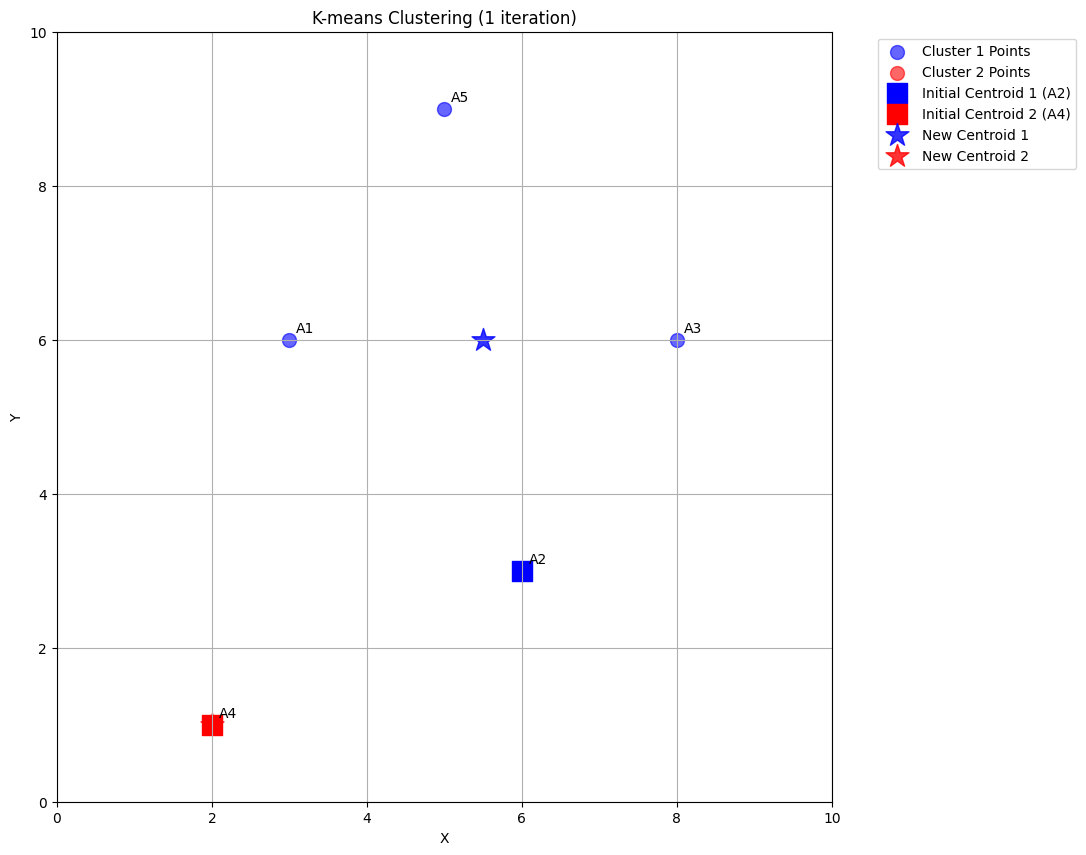

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Define the data points
points = np.array([
    [3, 6],  # A1
    [6, 3],  # A2
    [8, 6],  # A3
    [2, 1],  # A4
    [5, 9]   # A5
])

# Initial centroids (A2 and A4)
initial_centroids = np.array([
    [6, 3],  # C1 (A2)
    [2, 1]   # C2 (A4)
])

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Assign points to clusters based on distance to initial centroids
cluster_labels = []
for point in points:
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    cluster_labels.append(0 if dist_to_c1 < dist_to_c2 else 1)
cluster_labels = np.array(cluster_labels)

# Calculate new centroids
cluster1_points = points[cluster_labels == 0]
cluster2_points = points[cluster_labels == 1]
new_centroids = np.array([
    np.mean(cluster1_points, axis=0),
    np.mean(cluster2_points, axis=0)
])

print("\nCluster 1 points:", cluster1_points)
print("New centroid 1:", new_centroids[0])
print("\nCluster 2 points:", cluster2_points)
print("New centroid 2:", new_centroids[1])

# Create visualization
plt.figure(figsize=(10, 10))
plt.grid(True)

# Plot points for each cluster
plt.scatter(points[cluster_labels == 0][:, 0], points[cluster_labels == 0][:, 1], 
           c='blue', s=100, alpha=0.6, label='Cluster 1 Points')
plt.scatter(points[cluster_labels == 1][:, 0], points[cluster_labels == 1][:, 1], 
           c='red', s=100, alpha=0.6, label='Cluster 2 Points')

# Plot initial centroids with squares
plt.scatter(initial_centroids[0:1, 0], initial_centroids[0:1, 1], 
           c='blue', marker='s', s=200, facecolors='none', 
           label='Initial Centroid 1 (A2)')
plt.scatter(initial_centroids[1:2, 0], initial_centroids[1:2, 1], 
           c='red', marker='s', s=200, facecolors='none', 
           label='Initial Centroid 2 (A4)')

# Plot new centroids with stars and slight offset for Cluster 2
plt.scatter(new_centroids[0:1, 0], new_centroids[0:1, 1], 
           c='blue', marker='*', s=300, alpha=0.8,
           label='New Centroid 1')
plt.scatter(new_centroids[1:2, 0], new_centroids[1:2, 1], 
           c='red', marker='*', s=300, alpha=0.8,
           label='New Centroid 2')

# Add point labels
for i, (x, y) in enumerate(points):
    plt.annotate(f'A{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')

# Set plot limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering (1 iteration)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Print results
print("\nClustering Results:")
print("-----------------")
print("Distances from points to initial centroids:")
for i, point in enumerate(points):
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    print(f"\nPoint A{i+1} ({point[0]}, {point[1]}):")
    print(f"Distance to C1 (A2): {dist_to_c1:.2f}")
    print(f"Distance to C2 (A4): {dist_to_c2:.2f}")
    print(f"Assigned to Cluster: {cluster_labels[i] + 1}")

print("\nNew centroids:")
for i, centroid in enumerate(new_centroids):
    print(f"Cluster {i + 1}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

plt.show()